In [114]:
import sys
import time as tm
import numpy as np
import pickle as pk
import os
import subprocess as sp
import copy
sys.path.append('/home/igudich/work/mantid/python3Build/bin')
from mantid.simpleapi import *

import mantid
from graphviz import Digraph
from graphviz import Graph
import pickle as pk
import importlib
from dictionary_tree import *
importlib.reload(dictionary_tree)

<module 'dictionary_tree' from '/home/igudich/work/jupyterlab/dictionary_tree.py'>

In [3]:
mantid.config.appendDataSearchDir('./cmake-build-release-gcc/ExternalData/Testing/Data/SystemTest')

In [4]:
SNSPowderReduction(Filename='PG3_4844',
                               PreserveEvents=True,
                               CalibrationFile="PG3_FERNS_d4832_2011_08_24.cal",
                               CharacterizationRunsFile="PG3_characterization_2011_08_31-HR.txt",
                               LowResRef=15000, RemovePromptPulseWidth=50,
                               Binning=-0.0004, BinInDspace=True, FilterBadPulses=95,
                               SaveAs="gsas and fullprof and pdfgetn", OutputDirectory="/home/igudich/work/tmp",
                               FinalDataUnits="dSpacing")

SNSPowderReduction_returns(CharacterizationsTable=TableWorkspace
Columns: 14
Rows: 11
2 kB, OutputWorkspacePG3_4844=EventWorkspace
Title: diamond cw0.533 4.22e12 60Hz [10x30]
Histograms: 1
Bins: 7729
Histogram
X axis: d-Spacing / Angstrom
Y axis: Counts per microAmp.hour
Distribution: True
Instrument: POWGEN (2011-Feb-25 to 2012-Aug-19)Instrument from: /home/igudich/work/mantid/instrument/POWGEN_Definition_2011-02-25.xml

Parameters from: /home/igudich/work/mantid/instrument/POWGEN_Parameters.xml
Run start: 2011-Aug-12 15:50:17
Run end:  2011-Aug-12 17:22:05

Events: 1890146 (weighted, no times)
, OutputWorkspacePG3_4866=Workspace2D
Title: V rod in sample stick
Histograms: 1
Bins: 7729
Histogram
X axis: d-Spacing / Angstrom
Y axis: Counts per microAmp.hour
Distribution: False
Instrument: POWGEN (2011-Feb-25 to 2012-Aug-19)Instrument from: /home/igudich/work/mantid/instrument/POWGEN_Definition_2011-02-25.xml

Parameters from: /home/igudich/work/mantid/instrument/POWGEN_Parameters.xml
Ru

In [9]:
results = {}
for factor in range(1,21):
    dirName = '/media/igudich/2ecb279f-1d34-4ab5-8a8a-224220f5d50f/SNSReductionFiles/data_fact'+format(factor, '003')
    filename = dirName + "/PG3_77777_event.nxs"
    cal_file  = "PG3_FERNS_d4832_2011_08_24.cal"
    char_file = "PG3_characterization_2011_08_31-HR.txt"
    res = {}
    for threads in [1,2,4,8,12]:
        print("Factor = {}, threads = {}".format(factor, threads))
        mantid.config['MultiThreaded.MaxCores'] = str(threads)
        r = SNSPowderReduction(Filename=filename,
                               PreserveEvents=True,
                               CalibrationFile=cal_file,
                               CharacterizationRunsFile=char_file,
                               LowResRef=15000, RemovePromptPulseWidth=50,
                               Binning=-0.0004, BinInDspace=True, FilterBadPulses=95,
                               SaveAs="gsas and fullprof and pdfgetn", OutputDirectory="/home/igudich/work/tmp",
                               FinalDataUnits="dSpacing")
        w = mantid.api.AnalysisDataService["PG3_77777"]
        ah = w.getHistory().getAlgorithmHistories()
        res.update({threads : recWidthDct(ah)})
        dumpfile = '/media/igudich/2ecb279f-1d34-4ab5-8a8a-224220f5d50f/SNSReductionFiles/red_' + str(factor) + '_' + str(threads) + '.pickle'
        with open(dumpfile, 'wb') as f:
            pk.dump(res, f)
    results.update({factor : res })
    dumpfile = '/media/igudich/2ecb279f-1d34-4ab5-8a8a-224220f5d50f/SNSReductionFiles/res_' + str(factor) + '.pickle'
    with open(dumpfile, 'wb') as f:
        pk.dump(results, f)

Factor = 1, threads = 1
Factor = 1, threads = 2
Factor = 1, threads = 4
Factor = 1, threads = 8
Factor = 1, threads = 12
Factor = 2, threads = 1
Factor = 2, threads = 2
Factor = 2, threads = 4
Factor = 2, threads = 8
Factor = 2, threads = 12
Factor = 3, threads = 1
Factor = 3, threads = 2
Factor = 3, threads = 4
Factor = 3, threads = 8
Factor = 3, threads = 12
Factor = 4, threads = 1
Factor = 4, threads = 2
Factor = 4, threads = 4
Factor = 4, threads = 8
Factor = 4, threads = 12
Factor = 5, threads = 1
Factor = 5, threads = 2
Factor = 5, threads = 4
Factor = 5, threads = 8
Factor = 5, threads = 12
Factor = 6, threads = 1
Factor = 6, threads = 2
Factor = 6, threads = 4
Factor = 6, threads = 8
Factor = 6, threads = 12
Factor = 7, threads = 1
Factor = 7, threads = 2
Factor = 7, threads = 4
Factor = 7, threads = 8
Factor = 7, threads = 12
Factor = 8, threads = 1
Factor = 8, threads = 2
Factor = 8, threads = 4
Factor = 8, threads = 8
Factor = 8, threads = 12
Factor = 9, threads = 1
Factor =

In [112]:
dctDctTree = copy.deepcopy(results[20])

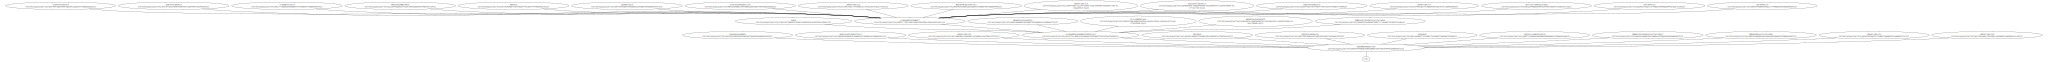

In [117]:
toDot(fitModel(dctDctTree, lambda x,y: (x,y)))

In [115]:
lst = listWidthOrder(fitModel(dctDctTree, lambda x,y: (x,y)))

In [116]:
for it in lst:
    print(it[0], " ", it[1][0])

root   (array([ 8,  1,  2,  4, 12]), array([0., 0., 0., 0., 0.]))
SNSPowderReduction1   (array([ 8,  1,  2,  4, 12]), array([69.56335449, 68.62398529, 68.83792877, 69.18464661, 69.58963013]))
SaveFocusedXYE32   (array([ 8,  1,  2,  4, 12]), array([0.03768297, 0.03830387, 0.0383875 , 0.03839048, 0.03854295]))
GeneratePythonScript33   (array([ 8,  1,  2,  4, 12]), array([0.00026202, 0.00035198, 0.00034475, 0.00034547, 0.00042541]))
ConvertUnits35   (array([ 8,  1,  2,  4, 12]), array([0.01158809, 0.01158092, 0.01163466, 0.01164475, 0.01157947]))
AlignAndFocusPowderFromFiles3   (array([ 8,  1,  2,  4, 12]), array([69.15779114, 68.23154449, 68.44755554, 68.77924347, 69.18740082]))
Load4   (array([ 8,  1,  2,  4, 12]), array([57.98135376, 56.92247009, 57.1628952 , 57.61528397, 58.11500931]))
AlignAndFocusPowder7   (array([ 8,  1,  2,  4, 12]), array([5.00517178, 5.14288139, 5.07829523, 5.01199961, 4.92349911]))
CropWorkspace10   (array([ 8,  1,  2,  4, 12]), array([0.02749572, 0.02496813, 0